# _Python for Scientific Data Analysis_


#  Matplotlib

## Section 2: Subplots and Axes Configurations
In the previous section, we saw how to create basic scatter and line plots (_plt.scatter_, _plt.plot_), plot data with error bars (_plt.errorbar_), and discussed how to customize the manner in which data themselves are presented.   Now we will discuss how to customize the plots themselves.   This includes creating figures consisting of multiple plots in various ways and customizing axes for plots, configuring axes, and adding insets and annotations.

### Subplots

Now, the real power behind the ```fig,axes=plt.subplots()``` command is to create *_subplots_* (i.e. a figure with multiple panels).  

```plt.subplots(nrows,ncols,figsize=(xfigsize,yfigsize),sharex=None,sharey=None)```.   

The first and second entries give the number of rows and columns for the set of panels comprising a figure.   
Here's a simple example with 2 rows and 1 column (i.e. vertically stacked panels):

In [71]:
#preamble stuff
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

from matplotlib import rcParams
#rcParams['figure.figsize']=[12,8]
plt.rcdefaults() #nah, let's use the default values


2


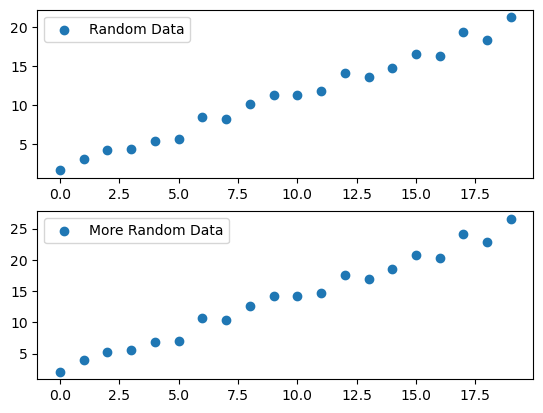

In [72]:
xarray=np.arange(0,20)
yarray=np.arange(20)+3*np.random.rand(20)
yarray2=yarray*1.25

#two rows, one column
fig,axes=plt.subplots(2,1)

print(len(axes))

axes[0].scatter(xarray,yarray,label='Random Data')
axes[1].scatter(xarray,yarray2,label='More Random Data')
axes[0].legend(loc='best')
axes[1].legend(loc='best')

Notice how the call works with the ``axes`` container.    In defining ``fig,axes``, we have set there are going to be two plots.   In fact if we had asked Python about axes it would tell it is has two elements:

``len(axes)``, which returns ``2``.

In [73]:
len(axes)

2

Here is a more complex example with 2 rows and 1 column (i.e. vertically stacked panels), where the top panel is the same linear fit to randomized data but the bottom panel is a quadratic fit to randomized data and we have included more plot customization:

Text(0, 0.5, 'Initial $Y_{Array}$')

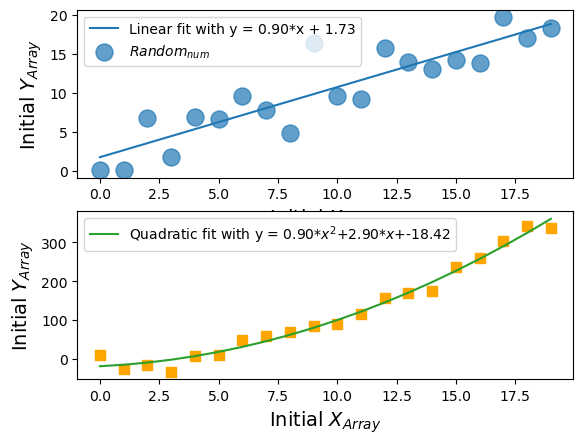

In [75]:
###(Ex_2.1)

 
xarray=np.arange(20)   #an array of numbers from 0 to 19
yarray=np.arange(20)+3*np.random.randn(20)
 #y is same as x EXCEPT now we vary the value +/- some random number about x

a,b=np.polyfit(xarray,yarray,1)
 #a polynomial fit of degree one 

 #yarray2 again varied +/- about x but with different amount of 20*random_number
yarray2=(np.arange(20))**2.+20*np.random.randn(20)
 
 #polynomial of degree two
a2,b2,c2=np.polyfit(xarray,yarray2,2)

poly=np.poly1d(np.polyfit(xarray,yarray2,2))
 #a convenience class to write the polynomial fit

 #two rows, 1 column: i.e. the plots are vertically stacked
fig,axes=plt.subplots(2,1) 
 
 #first subplot
axes[0].plot(xarray,xarray*a+b,label='Linear fit with y = {0:.2f}*x + {1:.2f}'.format(a,b))
axes[0].scatter(xarray,yarray,marker='o',s=150,alpha=0.7,label=r'$Random_{num}$')
axes[0].legend(loc='best',fontsize='medium')
axes[0].set_xlabel('Initial $X_{Array}$',size=14)#commenting this out, see the notes below
axes[0].set_ylabel('Initial $Y_{Array}$',size=14)

 #second subplot
axes[1].plot(xarray,poly(xarray),c='tab:green',
  label=r'Quadratic fit with y = {0:.2f}*$x^2$+{1:.2f}*$x$+{2:.2f}'.format(a2,b2,c2))

axes[1].scatter(xarray,yarray2,marker='s',c='orange',s=50)
axes[1].legend(loc='best',fontsize='medium')
axes[1].set_xlabel('Initial $X_{Array}$',size=14)
axes[1].set_ylabel('Initial $Y_{Array}$',size=14)

# plt.show()

#![](./code/sect2/figures/Ex2_1.png)

Now, you'll notice I didn't put any labels on the top plot's x-axis, that is because the spacing between the x and y axis labels on both subplots is a bit wonky (i.e. the bottom plot will obscure the top plot's x-axis label): watch what happens when I uncomment out the ``axes[0].set_xlabel`` line.   

You'll also notice that the x axis is the same for both figures but the y axis is different (b/c the range of y values in the second plot is larger).  But what if you are plotting something with different x values in the second plot?  The range of the axis will now differ.  on the second.  What if you want the y axis to have the same range in both plots?

We can adjust the subplot properties to fix these things and do other tunings in the following ways:

- _sharex[y]_  By default, each Axes is scaled individually.  But we can set whether or not to have the individual panels share axes (_sharex[y]_).  E.g. if you share the x axis then there is no reason to label the x-axis in both subplots.

- _subplots\_adjust_ will further tune the formatting and placement of figures.  Keywords include ``hspace``, which sets the height of the padding between subplots, and ``wspace``, which sets the width of the padding between subplots (both as a fraction of the average Axes height).   So if you define subplots as ``fig,axes = plt.subplots(2,1)``, setting ``fig.subplots_adjust(hspace=0)`` puts *no* vertical space between axes for the two vertically stacked plots.  

Other keywords (left, right, bottom, top) set the position of the edges of the subplots as a fraction of of the figure width.

The full API for these is here:

[https://matplotlib.org/stable/api/\_as\_gen/matplotlib.pyplot.subplots.html]()

[https://matplotlib.org/stable/api/\_as\_gen/matplotlib.pyplot.subplots\_adjust.html]()

Text(0, 0.5, 'Initial $Y_{Array}$')

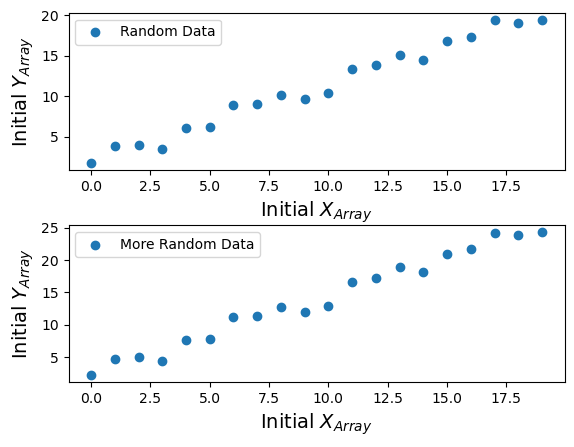

In [81]:
#Here is a simple example, adjusting the first plot

xarray=np.arange(0,20)
yarray=np.arange(20)+3*np.random.rand(20)
yarray2=yarray*1.25

#two rows, one column
fig,axes=plt.subplots(2,1)
fig.subplots_adjust(hspace=.35) #watch what happens when we change this
#,right=0.6,left=0.30

axes[0].scatter(xarray,yarray,label='Random Data')
axes[1].scatter(xarray,yarray2,label='More Random Data')
axes[0].legend(loc='best')
axes[1].legend(loc='best')
axes[0].set_xlabel('Initial $X_{Array}$',size=14)
axes[0].set_ylabel('Initial $Y_{Array}$',size=14)
axes[1].set_xlabel('Initial $X_{Array}$',size=14)
axes[1].set_ylabel('Initial $Y_{Array}$',size=14)

Now, watch what happens when we use do not/do use ``sharex[y]``...

Text(0, 0.5, 'Initial $Y_{Array}$')

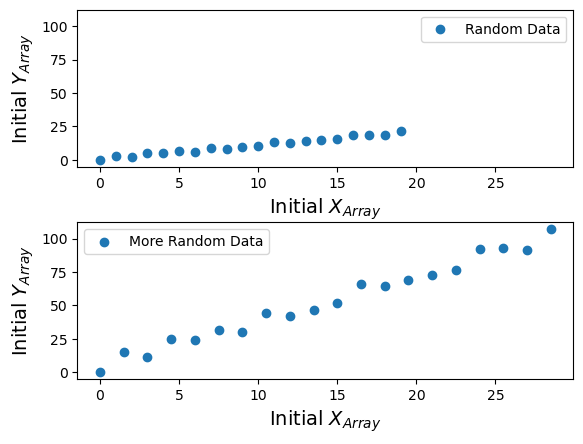

In [87]:


xarray=np.arange(0,20)
xarray2=xarray
xarray2=np.arange(0,20)*1.5
yarray=np.arange(20)+3*np.random.rand(20)
yarray2=yarray*5

#two rows, one column
#fig,axes=plt.subplots(2,1)
#fig,axes=plt.subplots(2,1,sharex=True)
fig,axes=plt.subplots(2,1,sharex=True,sharey=True)

fig.subplots_adjust(hspace=.35) #watch what happens when we change this

axes[0].scatter(xarray,yarray,label='Random Data')
axes[1].scatter(xarray2,yarray2,label='More Random Data')
axes[0].legend(loc='best')
axes[1].legend(loc='best')
axes[0].xaxis.set_tick_params(labelbottom=True) #this will make the x axis numbers in the top plot reappear
axes[0].set_xlabel('Initial $X_{Array}$',size=14)
axes[0].set_ylabel('Initial $Y_{Array}$',size=14)

#axes[0].set_ylim(0,np.max(yarray)) #this will force the y axis limits in the top plot to go from 0 to max(yarray)
#axes[1].set_ylim(0,np.max(yarray2)) #this will force the y axis limits in the top plot to go from 0 to max(yarray2)


axes[1].set_xlabel('Initial $X_{Array}$',size=14)
axes[1].set_ylabel('Initial $Y_{Array}$',size=14)

#### _More Examples_
Here are a couple of examples of adjusting subplots with two panels to make the panels appear nice, along with proper markup of the figures.

_**a)**_ vertically stacked panels with ``hspace=0.5`` to prevent overlapping labels.

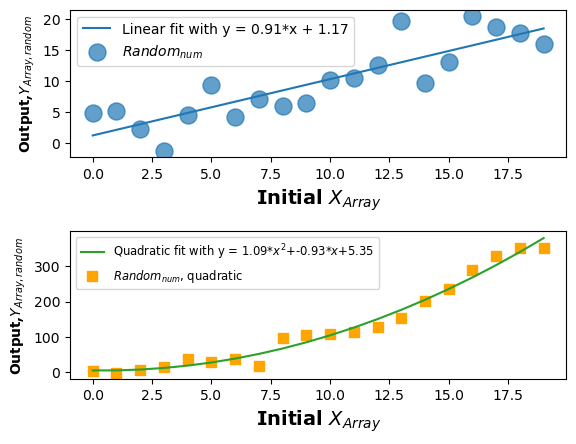

In [90]:
###(Ex_2.2a)


# import numpy as np 
# import matplotlib.pyplot as plt
#this will allow use NumPy's random number generator AND use the polynomial fit

xarray=np.arange(20)   #an array of numbers from 0 to 19
yarray=np.arange(20)+3*np.random.randn(20)
 #y is same as x EXCEPT now we vary the value +/- some random number about x

a,b=np.polyfit(xarray,yarray,1)
 #a polynomial fit of degree one look up the documentation if you are curious

yarray2=(np.arange(20))**2.+20*np.random.randn(20)

 #polynomial of degree two
a2,b2,c2=np.polyfit(xarray,yarray2,2)

poly=np.poly1d(np.polyfit(xarray,yarray2,2))
 #a convenience class to write the polynomial fit

fig,axes=plt.subplots(2,1)

fig.subplots_adjust(hspace=0.5)
axes[0].plot(xarray,xarray*a+b,label='Linear fit with y = {0:.2f}*x + {1:.2f}'.format(a,b))
axes[0].scatter(xarray,yarray,marker='o',s=150,alpha=0.7,label=r'$Random_{num}$')
axes[0].legend(loc='best')

axes[1].plot(xarray,poly(xarray),c='tab:green',label=r'Quadratic fit with y = {0:.2f}*$x^2$+{1:.2f}*$x$+{2:.2f}'.format(a2,b2,c2))

axes[1].scatter(xarray,yarray2,marker='s',c='orange',s=50, label=r'$Random_{num}$, quadratic')
axes[1].legend(loc='best',fontsize='small')

for i in range(len(axes)):

  axes[i].set_xlabel('Initial $X_{Array}$',font='Verdana',size=14,color='black',weight='bold')
  axes[i].set_ylabel(r'Output,$Y_{Array, random}$',font='Verdana',size=10,color='black',weight='bold')

#plt.show()


#![](./code/sect2/figures/Ex2_2a.png)

_**b)**_ side-by-side panels.
 with ``wspace=0.325`` to prevent overlapping labels.  Note, I also altered _figsize_ to double the width:




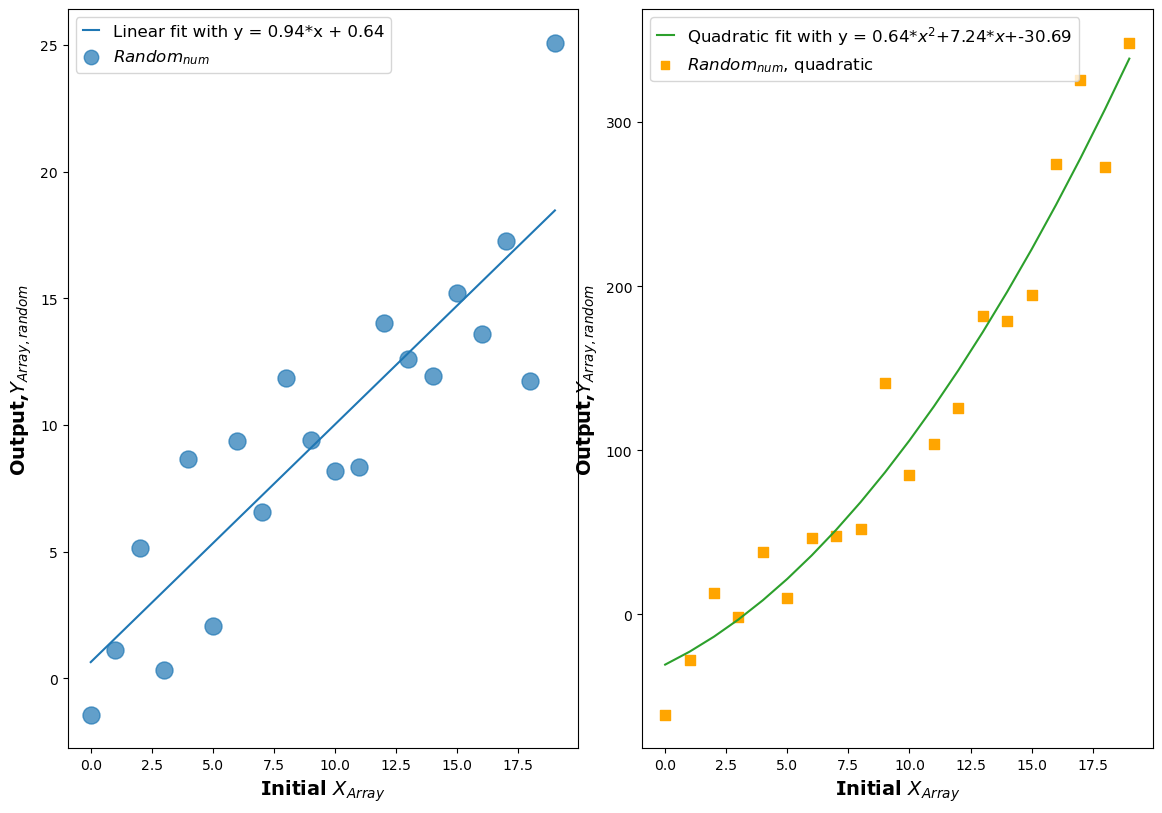

In [93]:
###(Ex_2.2b)
import matplotlib.pyplot as plt
import numpy as np

xarray=np.arange(20)   #an array of numbers from 0 to 19
yarray=np.arange(20)+3*np.random.randn(20)
 #y is same as x EXCEPT now we vary the value +/- some random number about x

a,b=np.polyfit(xarray,yarray,1)
 #a polynomial fit of degree one look up the documentation if you are curious

yarray2=(np.arange(20))**2.+20*np.random.randn(20)

 #polynomial of degree two
a2,b2,c2=np.polyfit(xarray,yarray2,2)

poly=np.poly1d(np.polyfit(xarray,yarray2,2))
 #a convenience class to write the polynomial fit

fig,axes=plt.subplots(1,2,figsize=(14,9.6))
#the default width is 6.4 inches by 4.8 inches, here increase width by 100%

#fig.subplots_adjust(wspace=0.325)
fig.subplots_adjust(wspace=0.125)
axes[0].plot(xarray,xarray*a+b,label='Linear fit with y = {0:.2f}*x + {1:.2f}'.format(a,b))
axes[0].scatter(xarray,yarray,marker='o',s=150,alpha=0.7,label=r'$Random_{num}$')
axes[0].legend(loc='upper left',fontsize='large',handlelength=1,markerscale=0.85)

axes[1].plot(xarray,poly(xarray),c='tab:green',label=r'Quadratic fit with y = {0:.2f}*$x^2$+{1:.2f}*$x$+{2:.2f}'.format(a2,b2,c2))

axes[1].scatter(xarray,yarray2,marker='s',c='orange',s=50, label=r'$Random_{num}$, quadratic')
axes[1].legend(loc='upper left',fontsize='large',handlelength=1,markerscale=0.85)

for i in range(len(axes)):

  axes[i].set_xlabel('Initial $X_{Array}$',font='Verdana',size=14,color='black',weight='bold')
  axes[i].set_ylabel(r'Output,$Y_{Array, random}$',font='Verdana',size=14,color='black',weight='bold')
 
# plt.show()

#![](./code/sect2/figures/Ex2_2b.png)

_**c)**_ vertically-stacked panels sharing x-axes.  



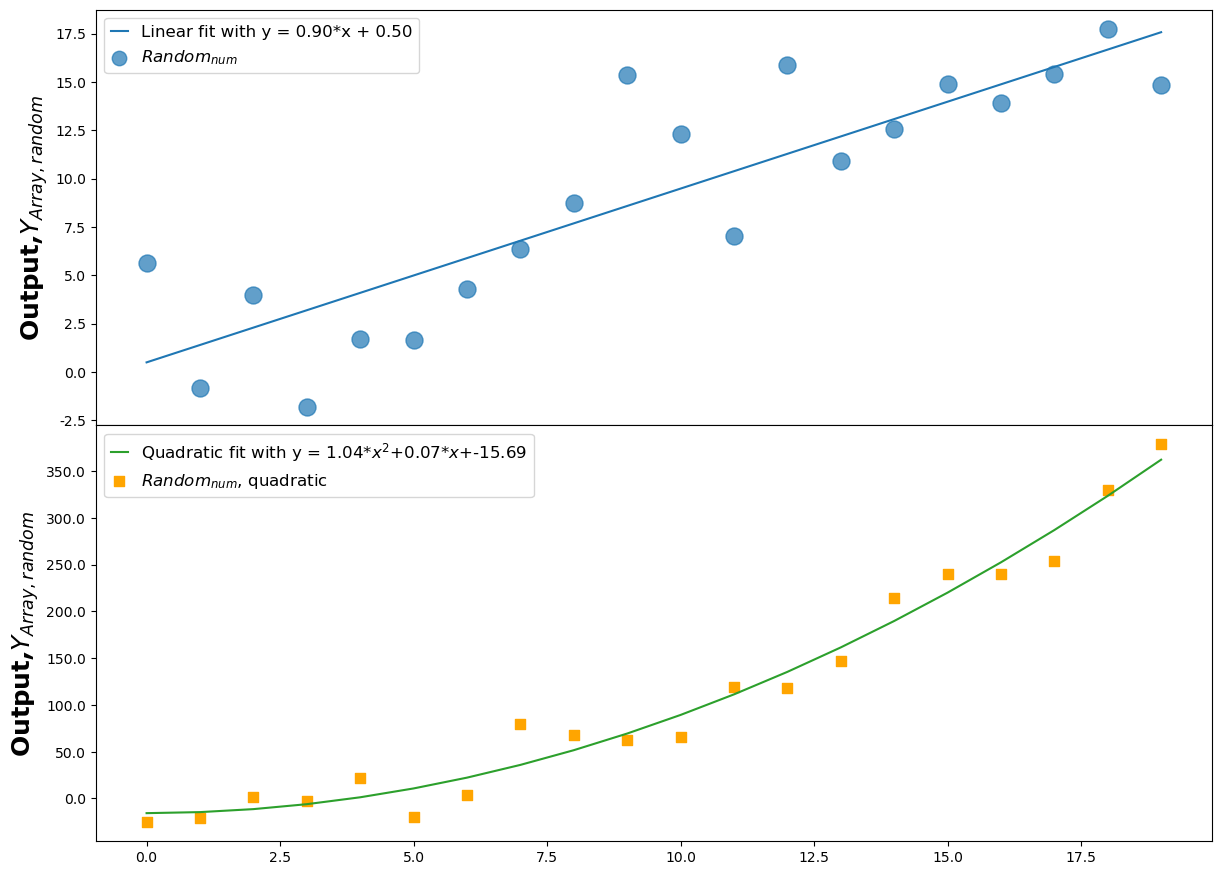

In [94]:
###(Ex_2.2c)
#import matplotlib.pyplot as plt

#import numpy as np

from matplotlib import ticker

xarray=np.arange(20)   #an array of numbers from 0 to 19
yarray=np.arange(20)+3*np.random.randn(20)
 #y is same as x EXCEPT now we vary the value +/- some random number about x

a,b=np.polyfit(xarray,yarray,1)
 #a polynomial fit of degree one look up the documentation if you are curious

yarray2=(np.arange(20))**2.+20*np.random.randn(20)

 #polynomial of degree two
a2,b2,c2=np.polyfit(xarray,yarray2,2)

poly=np.poly1d(np.polyfit(xarray,yarray2,2))
 #a convenience class to write the polynomial fit

standardsize=np.array((6.4,4.8))
scaleval=2.25
newsize=list(scaleval*standardsize)

fig,axes=plt.subplots(2,1,figsize=newsize)
#the default width is 6.4 inches by 4.8 inches, here increase width


fig.subplots_adjust(hspace=0.) #no 'height space' between panels




axes[0].plot(xarray,xarray*a+b,label='Linear fit with y = {0:.2f}*x + {1:.2f}'.format(a,b))
axes[0].scatter(xarray,yarray,marker='o',s=150,alpha=0.7,label=r'$Random_{num}$')
axes[0].legend(loc='upper left',fontsize='large',handlelength=1,markerscale=0.85)

axes[1].plot(xarray,poly(xarray),c='tab:green',label=r'Quadratic fit with y = {0:.2f}*$x^2$+{1:.2f}*$x$+{2:.2f}'.format(a2,b2,c2))

axes[1].scatter(xarray,yarray2,marker='s',c='orange',s=50, label=r'$Random_{num}$, quadratic')
axes[1].legend(loc='upper left',fontsize='large',handlelength=1)


#enforcing the same number of decimal points on the y-axis so the labels align
#WE WILL COVER THIS LATER
axes[0].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
axes[1].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))

for i in range(len(axes)):

  if i > 1:
   axes[i].set_xlabel('Initial $X_{Array}$',font='Verdana',size=18,color='black',weight='bold')
   #print the x axis label only along the bottom of the two panels
   
  axes[i].set_ylabel(r'Output,$Y_{Array, random}$',font='Verdana',size=18,color='black',weight='bold')

 #plt.show()

#![](./code/sect2/figures/Ex2_2c.png)

#### _Examples With Three or More Subplots_

You can make an indefinite number of subplots.   Here is an example of four subplots with no spacings: the linear and quadratic random number trends generated and fitted twice.  Note the coding trickery to make the y-axis labels and axes ticks appear on the righthand side for the plots on the right.  

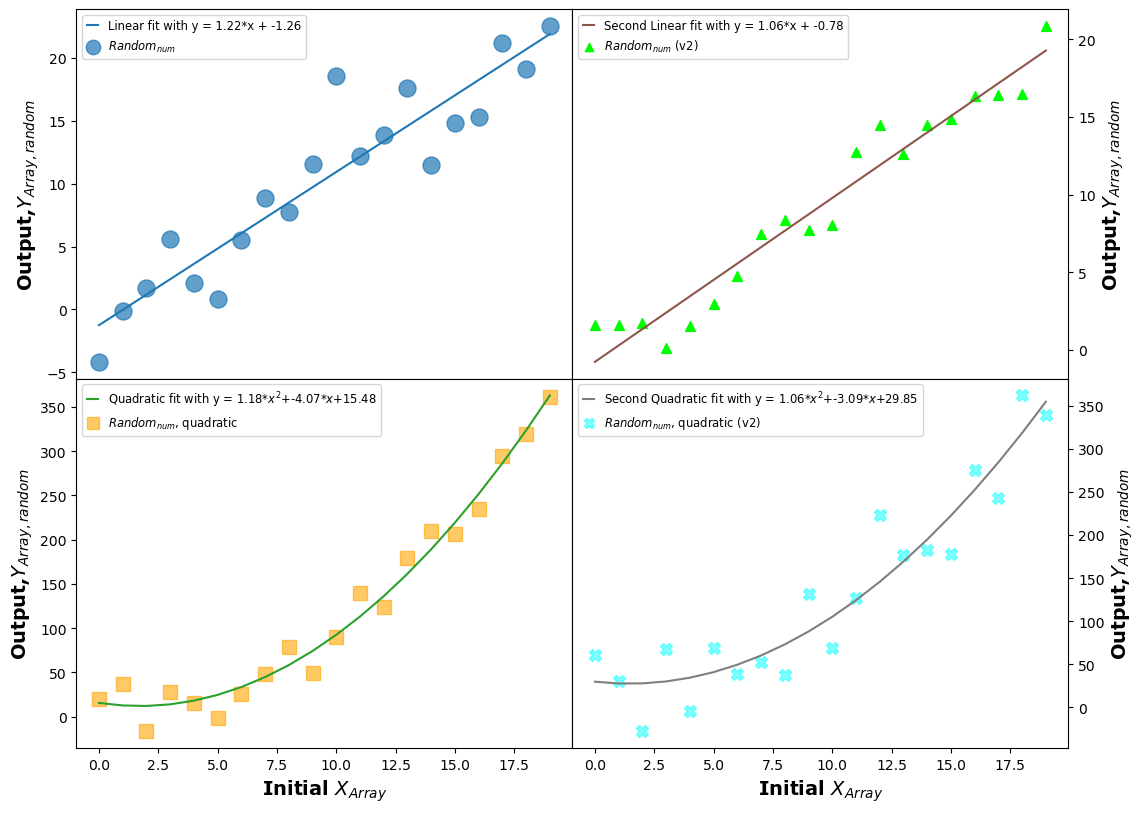

In [95]:
###(Ex2.2d)


#import matplotlib.pyplot as plt
#import numpy as np
 #from matplotlib.ticker import FormatStrFormatter
from matplotlib import ticker

xarray=np.arange(20)   #an array of numbers from 0 to 19

#Panel 1 determination
yarray=np.arange(20)+3*np.random.randn(20)
 #y is same as x EXCEPT now we vary the value +/- some random number about x

a,b=np.polyfit(xarray,yarray,1)
 #a polynomial fit of degree one look up the documentation if you are curious

#Panel 2 determination
yarray2=(np.arange(20))**2.+20*np.random.randn(20)

 #polynomial of degree two
a2,b2,c2=np.polyfit(xarray,yarray2,2)

poly=np.poly1d(np.polyfit(xarray,yarray2,2))
 #a convenience class to write the polynomial fit


#Panel 3 determination

yarray3=(np.arange(20))**2.+40*np.random.randn(20)

 #polynomial of degree two
a3,b3,c3=np.polyfit(xarray,yarray3,2)

poly2=np.poly1d(np.polyfit(xarray,yarray3,2))
 #a convenience class to write the polynomial fit


#Panel 4 determination
yarray4=np.arange(20)+1.5*np.random.randn(20)
 #y is same as x EXCEPT now we vary the value +/- some random number about x

a4,b4=np.polyfit(xarray,yarray4,1)
 #a polynomial fit of degree one look up the documentation if you are curious



standardsize=np.array((6.4,4.8))
scaleval=2
newsize=list(scaleval*standardsize)

#the default width is 6.4 inches by 4.8 inches, here increase width by 100% using variables
fig,axes=plt.subplots(2,2,figsize=newsize,sharex=True)
#,sharey=True)
fig.subplots_adjust(hspace=0,wspace=0)

# turn the fit labels, fit data points, fit colors, data point colors, data point sizes, ...
## data markers (symbols), data alphas ... all to lists

labels_fits = ['Linear fit with y = {0:.2f}*x + {1:.2f}'.format(a,b),'Second Linear fit with y = {0:.2f}*x + {1:.2f}'.format(a4,b4),
             r'Quadratic fit with y = {0:.2f}*$x^2$+{1:.2f}*$x$+{2:.2f}'.format(a2,b2,c2), r'Second Quadratic fit with y = {0:.2f}*$x^2$+{1:.2f}*$x$+{2:.2f}'.format(a3,b3,c3)]

labels_data=[r'$Random_{num}$',r'$Random_{num}$ (v2)',r'$Random_{num}$, quadratic',r'$Random_{num}$, quadratic (v2)']

colors_fit=['tab:blue','tab:brown','tab:green','tab:gray']

colors_data=['tab:blue','lime','orange','cyan']

sizes_data=[150,50,100,75]
marker_data=['o','^','s','X']
alphas_data=[0.7,1,0.6,0.5]

#turn the functional fits into a list

eq=[xarray*a+b,xarray*a4+b4,poly(xarray),poly2(xarray)]

#turn the generated data arrays into a list
dataarr=[yarray,yarray4,yarray2,yarray3]

#use python enumerate over axes; flatten axes ... columns first, then rows
# ax represents each iteration of axes (i.e. axes.flat([0]), axes.flat([1]), etc etc
# you advance i as well
for i,ax in enumerate(axes.flat):
  ax.plot(xarray,eq[i],label=labels_fits[i],c=colors_fit[i])
  ax.scatter(xarray,dataarr[i],marker=marker_data[i],c=colors_data[i],s=sizes_data[i],alpha=alphas_data[i],label=labels_data[i])
  ax.legend(loc='upper left',fontsize='small',handlelength=1,markerscale=0.85)
  ax.set_xlabel('Initial $X_{Array}$',font='Verdana',size=14,color='black',weight='bold')
  ax.set_ylabel(r'Output,$Y_{Array, random}$',font='Verdana',size=14,color='black',weight='bold')

#now, iterate over the subplots on the righthand side only
for ax in [axes[0,1],axes[1,1]]:
  ax.yaxis.tick_right()
  ax.yaxis.set_label_position("right")

#set tick marks to the right for these ,set the labels to the right for these

# plt.show()

#![](./code/sect2/figures/Ex2_2d.png)